## C1Ï°∞_Ï¢ÖÌï©Ïã§Ïäµ2(ÌõÑÌåê Í≥µÏ†ï Î∂àÎüâ ÏòÅÌñ• Ïù∏Ïûê Î∂ÑÏÑù ÌîÑÎ°úÏ†ùÌä∏)

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import warnings

from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
warnings.filterwarnings('ignore')


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

matplotlib.rc("font", family = "NanumBarunGothic")
matplotlib.rc('axes', unicode_minus=False)

In [4]:
import warnings
import platform
warnings.filterwarnings('ignore')

## 1. Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

In [92]:
df_raw = pd.read_csv("SCALEÎ∂àÎüâ.csv", encoding = 'euc-kr')
df_raw.head()

plate_no        rolling_date scale   spec_long spec_country steel_kind  \
0  PLT_1001  03JAN2023:07:07:53    ÏñëÌíà  AB/EH32-TM           ÎØ∏Íµ≠          T   
1  PLT_1002  03JAN2023:07:21:22    ÏñëÌíà  AB/EH32-TM           ÎØ∏Íµ≠          T   
2  PLT_1003  03JAN2023:07:31:15    ÏñëÌíà   NV-E36-TM           ÏòÅÍµ≠          T   
3  PLT_1004  03JAN2023:07:41:01    ÏñëÌíà   NV-E36-TM           ÏòÅÍµ≠          T   
4  PLT_1005  03JAN2023:07:52:40    ÏñëÌíà  BV-EH36-TM          ÌîÑÎûëÏä§          T   

   pt_thick  pt_width  pt_length hsb  ... fur_input_row fur_heat_temp  \
0        32      3700      15100  Ï†ÅÏö©  ...            1Ïó¥          1144   
1        32      3700      15100  Ï†ÅÏö©  ...            2Ïó¥          1144   
2        33      3600      19200  Ï†ÅÏö©  ...            1Ïó¥          1129   
3        33      3600      19200  Ï†ÅÏö©  ...            2Ïó¥          1152   
4        38      3100      13300  Ï†ÅÏö©  ...            1Ïó¥          1140   

   fur_heat_time  fur_soak_temp  fur_soak_time  fur_total_time  \
0            116           1133             59             259   
1            122           1135             53             238   
2            116           1121             55             258   
3            125           1127             68             266   
4            134           1128             48             246   

   rolling_method rolling_temp  descaling_count  work_group  
0      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          934                8          1Ï°∞  
1      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          937                8          1Ï°∞  
2      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          889                8          1Ï°∞  
3      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          885                8          1Ï°∞  
4      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          873                8          1Ï°∞  

[5 rows x 21 columns]

## 2. ÌÜµÍ≥Ñ Î∂ÑÏÑù

In [93]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

In [94]:
df_raw.describe()

pt_thick     pt_width     pt_length  fur_heat_temp  fur_heat_time  \
count  1000.00000  1000.000000   1000.000000    1000.000000    1000.000000   
mean     26.78200  2831.900000  36788.200000    1157.245000      85.972000   
std      18.13757   494.081478  13912.387116      21.245007      26.346297   
min      12.00000  1800.000000   7900.000000    1103.000000      55.000000   
25%      15.00000  2500.000000  26650.000000    1140.000000      66.000000   
50%      19.00000  2800.000000  40400.000000    1159.000000      75.000000   
75%      34.00000  3100.000000  49100.000000    1173.000000     102.250000   
max     100.00000  4600.000000  54900.000000    1206.000000     158.000000   

       fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
count    1000.000000    1000.000000     1000.000000   1000.000000   
mean     1150.928000      71.720000      238.589000    934.637000   
std        17.344384      20.602137       38.194828     96.598015   
min      1113.000000      35.000000      165.000000      0.000000   
25%      1135.750000      57.750000      210.000000    893.750000   
50%      1156.000000      66.000000      230.000000    948.000000   
75%      1164.000000      81.000000      263.000000    991.000000   
max      1185.000000     145.000000      362.000000   1078.000000   

       descaling_count  
count      1000.000000  
mean          8.557000  
std           1.604158  
min           5.000000  
25%           8.000000  
50%           9.000000  
75%          10.000000  
max          10.000000

plate_no Îäî Î∂ÑÏÑùÏóê ÌïÑÏöîÌïòÏßÄ Plate Î≤àÌò∏ Ï†ïÎ≥¥ ‚Üí Ïó¥ ÏÇ≠Ï†ú

In [95]:
df = df_raw
df.drop(labels = 'plate_no', axis = 1, inplace = True)

##### spec_longÏùò Í≤ΩÏö∞ Ï†úÌíà Í∑úÍ≤©ÏùÑ ÎÇòÌÉÄÎÉÑ '-'Î°ú Íµ¨Î∂ÑÎí§Ïñ¥ ‚ÄôÍ∑úÍ≤©‚Äô+‚ÄôÍ∞ïÏ†ú Îì±Í∏â‚Äô+‚ÄôÏó¥Ï≤òÎ¶¨ Î∞©Ïãù‚ÄôÏùò Ï†ïÎ≥¥Î•º Ìè¨Ìï®ÌïòÍ≥† ÏûàÏùå

## 3. Í≤∞Ï∏°Ïπò Ï†úÍ±∞

In [96]:
df.isnull().sum()

rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

##### Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥∏ Í≤∞Í≥º Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå

Î∂àÎüâ Î∞úÏÉù Ïó¨Î∂ÄÎ•º ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥ Î™©ÌëúÎ≥ÄÏàòÏù∏ scaleÏùÑ ÎìúÎûçÌï®

Í∑∏ÎûòÌîÑ ÌôïÏù∏ Í≤∞Í≥º, rolling_tempÍ∞Ä 0Ïù∏ Ïù¥ÏÉÅÏπòÎ•º ÌôïÏù∏Ìï† Ïàò ÏûàÎã§

In [97]:
outliers = df[df['rolling_temp'] == 0]
outliers

rolling_date scale   spec_long spec_country steel_kind  pt_thick  \
53   03JAN2023:16:22:29    ÏñëÌíà   GL-E36-TM           ÎèÖÏùº          T        56   
221  04JAN2023:19:44:09    ÏñëÌíà  JS-SM490YB           ÏùºÎ≥∏          C        16   
222  04JAN2023:19:56:39    ÏñëÌíà  JS-SM490YB           ÏùºÎ≥∏          C        16   
598  07JAN2023:11:40:51    ÏñëÌíà  PILAC-BT33           ÌïúÍµ≠          T        81   
599  07JAN2023:11:52:00    ÏñëÌíà  PILAC-BT33           ÌïúÍµ≠          T        81   
600  07JAN2023:11:59:10    ÏñëÌíà   NV-D32-TM           ÏòÅÍµ≠          T        40   

     pt_width  pt_length hsb fur_no fur_input_row  fur_heat_temp  \
53       3800      11400  Ï†ÅÏö©    3Ìò∏Í∏∞            2Ïó¥           1132   
221      2200      43600  Ï†ÅÏö©    3Ìò∏Í∏∞            2Ïó¥           1163   
222      2200      43600  Ï†ÅÏö©    3Ìò∏Í∏∞            1Ïó¥           1169   
598      2100      12900  Ï†ÅÏö©    2Ìò∏Í∏∞            1Ïó¥           1133   
599      2100      13200  Ï†ÅÏö©    1Ìò∏Í∏∞            2Ïó¥           1130   
600      2500      23600  Ï†ÅÏö©    3Ìò∏Í∏∞            1Ïó¥           1119   

     fur_heat_time  fur_soak_temp  fur_soak_time  fur_total_time  \
53              95           1128             80             244   
221             57           1166             67             228   
222             64           1164             61             188   
598             89           1122             59             229   
599             92           1124             61             210   
600            109           1117             76             260   

    rolling_method  rolling_temp  descaling_count work_group  
53      TMCP(Ïò®ÎèÑÏ†úÏñ¥)             0                6         1Ï°∞  
221       CR(Ï†úÏñ¥ÏïïÏó∞)             0               10         2Ï°∞  
222       CR(Ï†úÏñ¥ÏïïÏó∞)             0               10         2Ï°∞  
598       CR(Ï†úÏñ¥ÏïïÏó∞)             0                6         3Ï°∞  
599       CR(Ï†úÏñ¥ÏïïÏó∞)             0                6         3Ï°∞  
600     TMCP(Ïò®ÎèÑÏ†úÏñ¥)             0                6         3Ï°∞

In [98]:
df["ÎÖ∏ÎÉâÏãúÍ∞Ñ ÎπÑÏú®"]=(df["fur_total_time"]-df["fur_heat_time"]-df["fur_soak_time"])/df["fur_total_time"]

Í∑∏ÎûòÌîÑ ÌôïÏù∏ Í≤∞Í≥º, rolling_tempÍ∞Ä 0Ïù∏ Ïù¥ÏÉÅÏπòÎäî Ï¥ù 6Í∞ú


rolling_temp Í∞Ä 0Ïù∏ Ïù¥ÏÉÅÏπò Ï§ë, [Spec_long  , spec_country, steel_kind, rolling_method]Í∞Ä ÎèôÏùºÌïòÏó¨ ÏôÑÏ†Ñ ÎèôÏùº Ï†úÌíàÏúºÎ°ú ÌåêÎã®ÎêúÎã§Î©¥ Í∞í ÎåÄÏ≤¥ÌïúÎã§

In [99]:
# rolling_tempÍ∞Ä 0Ïù∏ Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
outliers = df[df['rolling_temp'] == 0]

# rolling_tempÍ∞Ä 0Ïù¥ ÏïÑÎãå Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
normal_data = df[df['rolling_temp'] != 0]

# ÏôÑÏ†Ñ ÎèôÏùº Ï†úÌíàÏù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞ Ï∞æÍ∏∞
matched_outliers = outliers[outliers.apply(lambda row:
    ((row["spec_long"], row["spec_country"], row["steel_kind"], row["rolling_method"])
     in normal_data.set_index(["spec_long", "spec_country", "steel_kind", "rolling_method"]).index),
    axis=1
)]

# Ï∂úÎ†•
matched_outliers

rolling_date scale   spec_long spec_country steel_kind  pt_thick  \
53   03JAN2023:16:22:29    ÏñëÌíà   GL-E36-TM           ÎèÖÏùº          T        56   
221  04JAN2023:19:44:09    ÏñëÌíà  JS-SM490YB           ÏùºÎ≥∏          C        16   
222  04JAN2023:19:56:39    ÏñëÌíà  JS-SM490YB           ÏùºÎ≥∏          C        16   
598  07JAN2023:11:40:51    ÏñëÌíà  PILAC-BT33           ÌïúÍµ≠          T        81   
599  07JAN2023:11:52:00    ÏñëÌíà  PILAC-BT33           ÌïúÍµ≠          T        81   
600  07JAN2023:11:59:10    ÏñëÌíà   NV-D32-TM           ÏòÅÍµ≠          T        40   

     pt_width  pt_length hsb fur_no  ... fur_heat_temp  fur_heat_time  \
53       3800      11400  Ï†ÅÏö©    3Ìò∏Í∏∞  ...          1132             95   
221      2200      43600  Ï†ÅÏö©    3Ìò∏Í∏∞  ...          1163             57   
222      2200      43600  Ï†ÅÏö©    3Ìò∏Í∏∞  ...          1169             64   
598      2100      12900  Ï†ÅÏö©    2Ìò∏Í∏∞  ...          1133             89   
599      2100      13200  Ï†ÅÏö©    1Ìò∏Í∏∞  ...          1130             92   
600      2500      23600  Ï†ÅÏö©    3Ìò∏Í∏∞  ...          1119            109   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_method  \
53            1128             80             244      TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
221           1166             67             228        CR(Ï†úÏñ¥ÏïïÏó∞)   
222           1164             61             188        CR(Ï†úÏñ¥ÏïïÏó∞)   
598           1122             59             229        CR(Ï†úÏñ¥ÏïïÏó∞)   
599           1124             61             210        CR(Ï†úÏñ¥ÏïïÏó∞)   
600           1117             76             260      TMCP(Ïò®ÎèÑÏ†úÏñ¥)   

    rolling_temp  descaling_count  work_group   ÎÖ∏ÎÉâÏãúÍ∞Ñ ÎπÑÏú®  
53             0                6          1Ï°∞  0.282787  
221            0               10          2Ï°∞  0.456140  
222            0               10          2Ï°∞  0.335106  
598            0                6          3Ï°∞  0.353712  
599            0                6          3Ï°∞  0.271429  
600            0                6          3Ï°∞  0.288462  

[6 rows x 21 columns]

In [100]:
matched_normal_data = normal_data.merge(
    matched_outliers,
    on=["spec_long", "spec_country", "steel_kind", "rolling_method"],
    suffixes=('_normal', '_outlier')
)
selected_columns = matched_normal_data[["spec_long", "spec_country", "steel_kind", "rolling_method", "rolling_temp_normal"]]

# Ï∂úÎ†•
selected_columns

spec_long spec_country steel_kind rolling_method  rolling_temp_normal
0     GL-E36-TM           ÎèÖÏùº          T     TMCP(Ïò®ÎèÑÏ†úÏñ¥)                  836
1     GL-E36-TM           ÎèÖÏùº          T     TMCP(Ïò®ÎèÑÏ†úÏñ¥)                  832
2     GL-E36-TM           ÎèÖÏùº          T     TMCP(Ïò®ÎèÑÏ†úÏñ¥)                  832
3     GL-E36-TM           ÎèÖÏùº          T     TMCP(Ïò®ÎèÑÏ†úÏñ¥)                  832
4     GL-E36-TM           ÎèÖÏùº          T     TMCP(Ïò®ÎèÑÏ†úÏñ¥)                  841
..          ...          ...        ...            ...                  ...
253  PILAC-BT33           ÌïúÍµ≠          T       CR(Ï†úÏñ¥ÏïïÏó∞)                  876
254  PILAC-BT33           ÌïúÍµ≠          T       CR(Ï†úÏñ¥ÏïïÏó∞)                  876
255  PILAC-BT33           ÌïúÍµ≠          T       CR(Ï†úÏñ¥ÏïïÏó∞)                  876
256  PILAC-BT33           ÌïúÍµ≠          T       CR(Ï†úÏñ¥ÏïïÏó∞)                  842
257  PILAC-BT33           ÌïúÍµ≠          T       CR(Ï†úÏñ¥ÏïïÏó∞)                  842

[258 rows x 5 columns]

rolling_temp Í∞Ä 0Ïù∏ Ïù¥ÏÉÅÏπò Ï§ë ÎèôÏùº Ï†úÌíàÏù¥ Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§

In [101]:
# rolling_tempÍ∞Ä 0Ïù∏ ÌñâÍ≥º 0Ïù¥ ÏïÑÎãå Ìñâ Î∂ÑÎ¶¨
outliers = df[df['rolling_temp'] == 0]
normal_data = df[df['rolling_temp'] != 0]

# ÎèôÏùºÌïú Ï†úÌíàÏùò rolling_temp ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
mean_temps = normal_data.groupby(['spec_long', 'spec_country', 'steel_kind', 'rolling_method'])['rolling_temp'].mean().reset_index()
mean_temps.rename(columns={'rolling_temp': 'mean_rolling_temp'}, inplace=True)

# Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ÏôÄ ÌèâÍ∑†Í∞íÏùÑ Î≥ëÌï©ÌïòÏó¨ rolling_tempÎ•º ÎåÄÏ≤¥
outliers = outliers.merge(mean_temps, on=['spec_long', 'spec_country', 'steel_kind', 'rolling_method'], how='left')
outliers['rolling_temp'] = outliers['mean_rolling_temp']  # ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥
outliers.drop(columns=['mean_rolling_temp'], inplace=True)  # Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤∞Ìï©
df.update(outliers)

In [102]:
outliers = df[df['rolling_temp'] == 0]
outliers

rolling_date scale   spec_long spec_country steel_kind  pt_thick  \
53   03JAN2023:16:22:29    ÏñëÌíà   GL-E36-TM           ÎèÖÏùº          T      56.0   
221  04JAN2023:19:44:09    ÏñëÌíà  JS-SM490YB           ÏùºÎ≥∏          C      16.0   
222  04JAN2023:19:56:39    ÏñëÌíà  JS-SM490YB           ÏùºÎ≥∏          C      16.0   
598  07JAN2023:11:40:51    ÏñëÌíà  PILAC-BT33           ÌïúÍµ≠          T      81.0   
599  07JAN2023:11:52:00    ÏñëÌíà  PILAC-BT33           ÌïúÍµ≠          T      81.0   
600  07JAN2023:11:59:10    ÏñëÌíà   NV-D32-TM           ÏòÅÍµ≠          T      40.0   

     pt_width  pt_length hsb fur_no  ... fur_heat_temp  fur_heat_time  \
53     3800.0    11400.0  Ï†ÅÏö©    3Ìò∏Í∏∞  ...        1132.0           95.0   
221    2200.0    43600.0  Ï†ÅÏö©    3Ìò∏Í∏∞  ...        1163.0           57.0   
222    2200.0    43600.0  Ï†ÅÏö©    3Ìò∏Í∏∞  ...        1169.0           64.0   
598    2100.0    12900.0  Ï†ÅÏö©    2Ìò∏Í∏∞  ...        1133.0           89.0   
599    2100.0    13200.0  Ï†ÅÏö©    1Ìò∏Í∏∞  ...        1130.0           92.0   
600    2500.0    23600.0  Ï†ÅÏö©    3Ìò∏Í∏∞  ...        1119.0          109.0   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_method  \
53          1128.0           80.0           244.0      TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
221         1166.0           67.0           228.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
222         1164.0           61.0           188.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
598         1122.0           59.0           229.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
599         1124.0           61.0           210.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
600         1117.0           76.0           260.0      TMCP(Ïò®ÎèÑÏ†úÏñ¥)   

    rolling_temp  descaling_count  work_group   ÎÖ∏ÎÉâÏãúÍ∞Ñ ÎπÑÏú®  
53           0.0              6.0          1Ï°∞  0.282787  
221          0.0             10.0          2Ï°∞  0.456140  
222          0.0             10.0          2Ï°∞  0.335106  
598          0.0              6.0          3Ï°∞  0.353712  
599          0.0              6.0          3Ï°∞  0.271429  
600          0.0              6.0          3Ï°∞  0.288462  

[6 rows x 21 columns]

In [103]:
df = df[df['rolling_temp'] != 0]

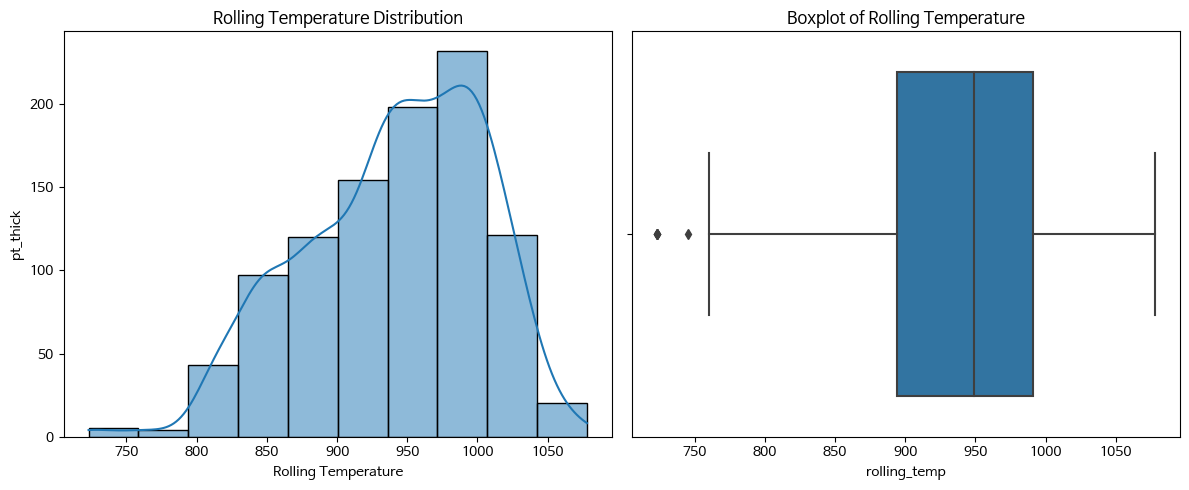

In [104]:
# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ÌûàÏä§ÌÜ†Í∑∏Îû®
sns.histplot(df["rolling_temp"], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Rolling Temperature Distribution")
axes[0].set_xlabel("Rolling Temperature")
axes[0].set_ylabel("pt_thick")

# Î∞ïÏä§ÌîåÎ°Ø
sns.boxplot(x=df["rolling_temp"], ax=axes[1])
axes[1].set_title("Boxplot of Rolling Temperature")

plt.tight_layout()
plt.show()

In [105]:
df_sorted = df.sort_values(by="rolling_temp", ascending=True)
print(df_sorted)


           rolling_date scale  spec_long spec_country steel_kind  pt_thick  \
634  07JAN2023:17:24:17    ÏñëÌíà       NV-A           ÏòÅÍµ≠          C      13.0   
631  07JAN2023:17:02:18    ÏñëÌíà       BV-A          ÌîÑÎûëÏä§          C      13.0   
632  07JAN2023:17:10:22    ÏñëÌíà       LR-A           ÏòÅÍµ≠          C      13.0   
633  07JAN2023:17:16:29    ÏñëÌíà      NK-KA           ÏùºÎ≥∏          C      13.0   
549  07JAN2023:03:06:44    ÏñëÌíà  GL-A36-TM           ÎèÖÏùº          T      40.0   
..                  ...   ...        ...          ...        ...       ...   
188  04JAN2023:14:34:33    Î∂àÎüâ   JS-SS400           ÏùºÎ≥∏          C      40.0   
191  04JAN2023:15:01:42    Î∂àÎüâ   JS-SS400           ÏùºÎ≥∏          C      80.0   
716  08JAN2023:07:04:51    Î∂àÎüâ  KS-SM400A           ÌïúÍµ≠          C      40.0   
715  08JAN2023:06:57:53    Î∂àÎüâ   JS-SS400           ÏùºÎ≥∏          C      40.0   
187  04JAN2023:14:28:38    Î∂àÎüâ   JS-SS400           ÏùºÎ≥∏       

rolling_temp Í∞Ä 0Ïù∏ Ïù¥ÏÉÅÏπòÍ∞Ä Ï†ÑÎ∂Ä ÏÇ¨ÎùºÏßêÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§

In [106]:
df

rolling_date scale   spec_long spec_country steel_kind  pt_thick  \
0    03JAN2023:16:22:29    ÏñëÌíà   GL-E36-TM           ÎèÖÏùº          T      56.0   
1    04JAN2023:19:44:09    ÏñëÌíà  JS-SM490YB           ÏùºÎ≥∏          C      16.0   
2    04JAN2023:19:56:39    ÏñëÌíà  JS-SM490YB           ÏùºÎ≥∏          C      16.0   
3    07JAN2023:11:40:51    ÏñëÌíà  PILAC-BT33           ÌïúÍµ≠          T      81.0   
4    07JAN2023:11:52:00    ÏñëÌíà  PILAC-BT33           ÌïúÍµ≠          T      81.0   
..                  ...   ...         ...          ...        ...       ...   
995  10JAN2023:05:32:25    ÏñëÌíà        BV-A          ÌîÑÎûëÏä§          C      19.0   
996  10JAN2023:05:39:19    ÏñëÌíà        LR-A           ÏòÅÍµ≠          C      19.0   
997  10JAN2023:05:52:41    ÏñëÌíà     AB/AH32           ÎØ∏Íµ≠          C      17.0   
998  10JAN2023:06:01:50    ÏñëÌíà      NV-A32           ÏòÅÍµ≠          C      17.0   
999  10JAN2023:06:16:27    ÏñëÌíà      GL-A32           ÎèÖÏùº          C      16.0   

     pt_width  pt_length hsb fur_no  ... fur_heat_temp  fur_heat_time  \
0      3800.0    11400.0  Ï†ÅÏö©    3Ìò∏Í∏∞  ...        1132.0           95.0   
1      2200.0    43600.0  Ï†ÅÏö©    3Ìò∏Í∏∞  ...        1163.0           57.0   
2      2200.0    43600.0  Ï†ÅÏö©    3Ìò∏Í∏∞  ...        1169.0           64.0   
3      2100.0    12900.0  Ï†ÅÏö©    2Ìò∏Í∏∞  ...        1133.0           89.0   
4      2100.0    13200.0  Ï†ÅÏö©    1Ìò∏Í∏∞  ...        1130.0           92.0   
..        ...        ...  ..    ...  ...           ...            ...   
995    3400.0    41500.0  Ï†ÅÏö©    1Ìò∏Í∏∞  ...        1142.0           55.0   
996    3400.0    41500.0  Ï†ÅÏö©    1Ìò∏Í∏∞  ...        1142.0           55.0   
997    3400.0    43700.0  Ï†ÅÏö©    2Ìò∏Í∏∞  ...        1169.0           65.0   
998    3400.0    43700.0  Ï†ÅÏö©    2Ìò∏Í∏∞  ...        1169.0           65.0   
999    3400.0    54200.0  Ï†ÅÏö©    3Ìò∏Í∏∞  ...        1186.0           82.0   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_method  \
0           1128.0           80.0           244.0      TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
1           1166.0           67.0           228.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
2           1164.0           61.0           188.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
3           1122.0           59.0           229.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
4           1124.0           61.0           210.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
..             ...            ...             ...             ...   
995         1151.0           86.0           203.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
996         1151.0           86.0           209.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
997         1163.0           77.0           227.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
998         1163.0           77.0           204.0        CR(Ï†úÏñ¥ÏïïÏó∞)   
999         1169.0           45.0           208.0        CR(Ï†úÏñ¥ÏïïÏó∞)   

    rolling_temp  descaling_count  work_group   ÎÖ∏ÎÉâÏãúÍ∞Ñ ÎπÑÏú®  
0     842.466667              6.0          1Ï°∞  0.282787  
1     978.926829             10.0          2Ï°∞  0.456140  
2     978.926829             10.0          2Ï°∞  0.335106  
3     885.605263              6.0          3Ï°∞  0.353712  
4     885.605263              6.0          3Ï°∞  0.271429  
..           ...              ...         ...       ...  
995   948.000000             10.0          4Ï°∞  0.305419  
996   948.000000             10.0          4Ï°∞  0.325359  
997   948.000000             10.0          4Ï°∞  0.374449  
998   948.000000             10.0          4Ï°∞  0.303922  
999   957.000000             10.0          4Ï°∞  0.389423  

[994 rows x 21 columns]

In [107]:
df[['Class_Code', 'Grade', 'Treatment']] = df['spec_long'].str.split('[-/]', expand=True)

In [108]:
df.drop(columns=["Treatment"],axis=1,inplace=True)

In [109]:
df[["Class_Code","Grade"]].isnull().sum()

Class_Code     0
Grade         40
dtype: int64

In [110]:
df_filtered = df[df["Class_Code"].str.contains("H", na=False) | df["Grade"].str.contains("H", na=False)]
df_filtered

rolling_date scale   spec_long spec_country steel_kind  pt_thick  \
6    03JAN2023:08:14:02    ÏñëÌíà  BV-EH36-TM          ÌîÑÎûëÏä§          T      38.0   
7    03JAN2023:08:24:12    ÏñëÌíà  BV-EH36-TM          ÌîÑÎûëÏä§          T      38.0   
8    03JAN2023:08:38:23    ÏñëÌíà  BV-EH36-TM          ÌîÑÎûëÏä§          T      38.0   
9    03JAN2023:08:45:58    Î∂àÎüâ  AB/EH36-TM           ÎØ∏Íµ≠          T      38.0   
11   03JAN2023:09:02:30    ÏñëÌíà  AB/EH36-TM           ÎØ∏Íµ≠          T      38.0   
..                  ...   ...         ...          ...        ...       ...   
982  10JAN2023:03:13:17    ÏñëÌíà     LR-AH32           ÏòÅÍµ≠          C      12.0   
983  10JAN2023:03:21:21    ÏñëÌíà     LR-AH32           ÏòÅÍµ≠          C      12.0   
986  10JAN2023:03:50:18    ÏñëÌíà     LR-AH32           ÏòÅÍµ≠          C      15.0   
988  10JAN2023:04:09:30    ÏñëÌíà     AB/AH32           ÎØ∏Íµ≠          C      18.0   
997  10JAN2023:05:52:41    ÏñëÌíà     AB/AH32           ÎØ∏Íµ≠          C      17.0   

     pt_width  pt_length hsb fur_no  ... fur_soak_temp  fur_soak_time  \
6      3100.0    16700.0  Ï†ÅÏö©    1Ìò∏Í∏∞  ...        1130.0           50.0   
7      3100.0    16700.0  Ï†ÅÏö©    1Ìò∏Í∏∞  ...        1131.0           52.0   
8      3100.0    16700.0  Ï†ÅÏö©    2Ìò∏Í∏∞  ...        1122.0           52.0   
9      3100.0    16200.0  Ï†ÅÏö©    2Ìò∏Í∏∞  ...        1124.0           73.0   
11     3100.0    16200.0  Ï†ÅÏö©    3Ìò∏Í∏∞  ...        1123.0           58.0   
..        ...        ...  ..    ...  ...           ...            ...   
982    3100.0    53800.0  Ï†ÅÏö©    2Ìò∏Í∏∞  ...        1159.0           61.0   
983    3100.0    53800.0  Ï†ÅÏö©    3Ìò∏Í∏∞  ...        1163.0           71.0   
986    3200.0    48200.0  Ï†ÅÏö©    2Ìò∏Í∏∞  ...        1169.0           61.0   
988    3300.0    40600.0  Ï†ÅÏö©    1Ìò∏Í∏∞  ...        1160.0           71.0   
997    3400.0    43700.0  Ï†ÅÏö©    2Ìò∏Í∏∞  ...        1163.0           77.0   

     fur_total_time  rolling_method  rolling_temp  descaling_count work_group  \
6             278.0      TMCP(Ïò®ÎèÑÏ†úÏñ¥)         878.0              8.0         1Ï°∞   
7             272.0      TMCP(Ïò®ÎèÑÏ†úÏñ¥)         870.0              8.0         1Ï°∞   
8             241.0      TMCP(Ïò®ÎèÑÏ†úÏñ¥)         873.0              8.0         1Ï°∞   
9             290.0      TMCP(Ïò®ÎèÑÏ†úÏñ¥)         881.0              7.0         1Ï°∞   
11            252.0      TMCP(Ïò®ÎèÑÏ†úÏñ¥)         869.0              8.0         1Ï°∞   
..              ...             ...           ...              ...        ...   
982           227.0        CR(Ï†úÏñ¥ÏïïÏó∞)         919.0             10.0         4Ï°∞   
983           215.0        CR(Ï†úÏñ¥ÏïïÏó∞)         913.0             10.0         4Ï°∞   
986           218.0        CR(Ï†úÏñ¥ÏïïÏó∞)         947.0             10.0         4Ï°∞   
988           239.0        CR(Ï†úÏñ¥ÏïïÏó∞)         965.0             10.0         4Ï°∞   
997           227.0        CR(Ï†úÏñ¥ÏïïÏó∞)         948.0             10.0         4Ï°∞   

      ÎÖ∏ÎÉâÏãúÍ∞Ñ ÎπÑÏú®  Class_Code Grade  
6    0.366906          BV  EH36  
7    0.345588          BV  EH36  
8    0.261411          BV  EH36  
9    0.337931          AB  EH36  
11   0.238095          AB  EH36  
..        ...         ...   ...  
982  0.405286          LR  AH32  
983  0.367442          LR  AH32  
986  0.440367          LR  AH32  
988  0.426778          AB  AH32  
997  0.374449          AB  AH32  

[221 rows x 23 columns]

In [111]:
df_filtered["scale"].value_counts()

ÏñëÌíà    176
Î∂àÎüâ     45
Name: scale, dtype: int64

In [112]:
df["scale"].value_counts()

ÏñëÌíà    684
Î∂àÎüâ    310
Name: scale, dtype: int64

In [113]:
df["Ïò®ÎèÑ Ï∞®Ïù¥(fur_soak - rolling_temp)"] = df["fur_soak_temp"]-df["rolling_temp"]

In [114]:
df.sort_values(by="scale",inplace=True)
df.reset_index(inplace=True)

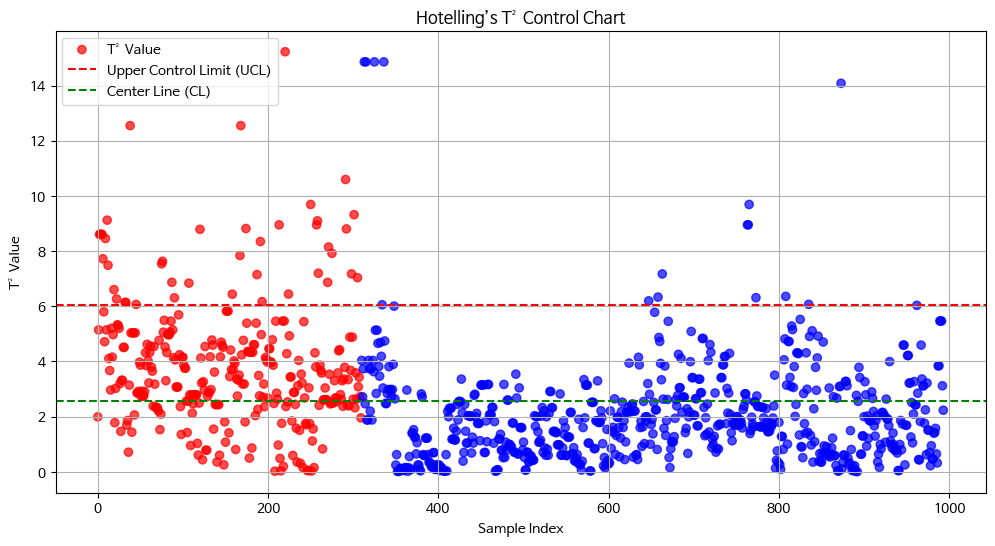

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f

# ÏñëÌíà(OK)Í≥º Î∂àÎüâ(Defect) Íµ¨Î∂Ñ
df["Status"] = df["scale"].apply(lambda x: "OK" if x == "ÏñëÌíà" else "Defect")

# Îã§Î≥ÄÎüâ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Î≥ÄÏàò ÏÑ†ÌÉù
variables = ["Ïò®ÎèÑ Ï∞®Ïù¥(fur_soak - rolling_temp)", "fur_heat_temp"]  # ÏòàÏ†ú Î≥ÄÏàò
df_ok = df[df["Status"] == "OK"][variables]  # ÏñëÌíà Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©

# ÌèâÍ∑† Î≤°ÌÑ∞ÏôÄ Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ Í≥ÑÏÇ∞
mu = df_ok.mean().values  # ÌèâÍ∑† Î≤°ÌÑ∞
cov_matrix = np.cov(df_ok.T)  # Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨
inv_cov_matrix = np.linalg.inv(cov_matrix)  # Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨Ïùò Ïó≠ÌñâÎ†¨

# Hotelling‚Äôs T¬≤ Í∞í Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_t2(row):
    diff = row.values - mu
    return np.dot(np.dot(diff.T, inv_cov_matrix), diff)

df["T2"] = df[variables].apply(calculate_t2, axis=1)

# UCL (F Î∂ÑÌè¨ Í∏∞Î∞ò ÌïúÍ≥Ñ Í≥ÑÏÇ∞)
p = len(variables)  # Î≥ÄÏàò Í∞úÏàò
n = len(df_ok)  # ÏñëÌíà ÏÉòÌîå Í∞úÏàò
alpha = 0.05  # Ïã†Î¢∞ÏàòÏ§Ä 95%
UCL = (p * (n + 1) * f.ppf(1 - alpha, p, n - p)) / (n - p)

# ÏÉâÏÉÅ ÏÑ§Ï†ï (ÏñëÌíà=ÌååÎûë, Î∂àÎüâ=Îπ®Í∞ï)
colors = df["Status"].map({"OK": "blue", "Defect": "red"})

# Hotelling‚Äôs T¬≤ Í¥ÄÎ¶¨ÎèÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df["T2"], c=colors, label="T¬≤ Value", alpha=0.7)
plt.axhline(UCL, color='red', linestyle='--', label="Upper Control Limit (UCL)")
plt.axhline(df["T2"].mean(), color='green', linestyle='--', label="Center Line (CL)")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title("Hotelling‚Äôs T¬≤ Control Chart")
plt.xlabel("Sample Index")
plt.ylabel("T¬≤ Value")
plt.legend()
plt.grid(True)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()


In [116]:
# scaler = StandardScaler()
# df1=df.select_dtypes(include='number').columns
# df[df1] = scaler.fit_transform(df[df1])
# df

In [118]:
df["Ïò®ÎèÑ Ï∞®Ïù¥(fur_heat-fur_soak)"] = df["fur_heat_temp"]-df["fur_soak_temp"]

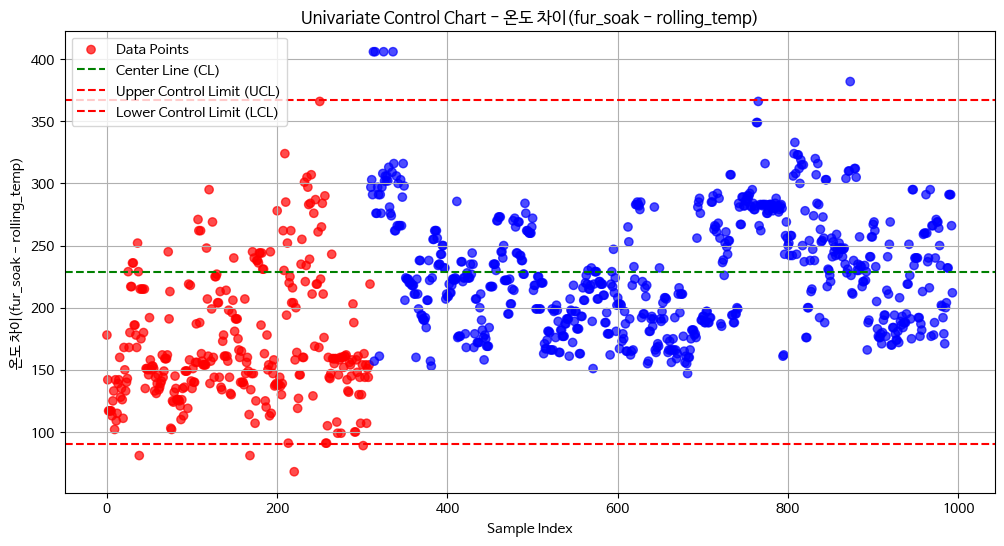

yÏ∂ï Í∞íÏù¥ 150 Ïù¥ÌïòÏù∏ Î∂àÎüâ Í∞úÏàò: 131


In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ÏñëÌíà(OK)Í≥º Î∂àÎüâ(Defect) Íµ¨Î∂Ñ
df["Status"] = df["scale"].apply(lambda x: "OK" if x == "ÏñëÌíà" else "Defect")

# Îã®Î≥ÄÎüâ Í¥ÄÎ¶¨ÎèÑÎ•º ÏúÑÌïú Î≥ÄÏàò ÏÑ†ÌÉù
var = "Ïò®ÎèÑ Ï∞®Ïù¥(fur_soak - rolling_temp)"  # Î∂ÑÏÑùÌï† Îã®Î≥ÄÎüâ Î≥ÄÏàò

# ÏñëÌíà(OK) Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
df_ok = df[df["Status"] == "OK"]
CL = df_ok[var].mean()  # Ï§ëÏã¨ÏÑ†
sigma = df_ok[var].std()  # ÌëúÏ§ÄÌé∏Ï∞®
UCL = CL + (3 * sigma)  # ÏÉÅÌïú Í¥ÄÎ¶¨ ÌïúÍ≥Ñ
LCL = CL - (3 * sigma)  # ÌïòÌïú Í¥ÄÎ¶¨ ÌïúÍ≥Ñ

# ÏÉâÏÉÅ ÏÑ§Ï†ï (ÏñëÌíà=ÌååÎûë, Î∂àÎüâ=Îπ®Í∞ï)
colors = df["Status"].map({"OK": "blue", "Defect": "red"})

# Îã®Î≥ÄÎüâ Í¥ÄÎ¶¨ÎèÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df[var], c=colors, label="Data Points", alpha=0.7)
plt.axhline(CL, color='green', linestyle='--', label="Center Line (CL)")
plt.axhline(UCL, color='red', linestyle='--', label="Upper Control Limit (UCL)")
plt.axhline(LCL, color='red', linestyle='--', label="Lower Control Limit (LCL)")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title(f"Univariate Control Chart - {var}")
plt.xlabel("Sample Index")
plt.ylabel(var)
plt.legend()
plt.grid(True)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()
count_defect_under_150 = df[(df["Status"] == "Defect") & (df[var] <= 150)].shape[0]

print("yÏ∂ï Í∞íÏù¥ 150 Ïù¥ÌïòÏù∏ Î∂àÎüâ Í∞úÏàò:", count_defect_under_150)

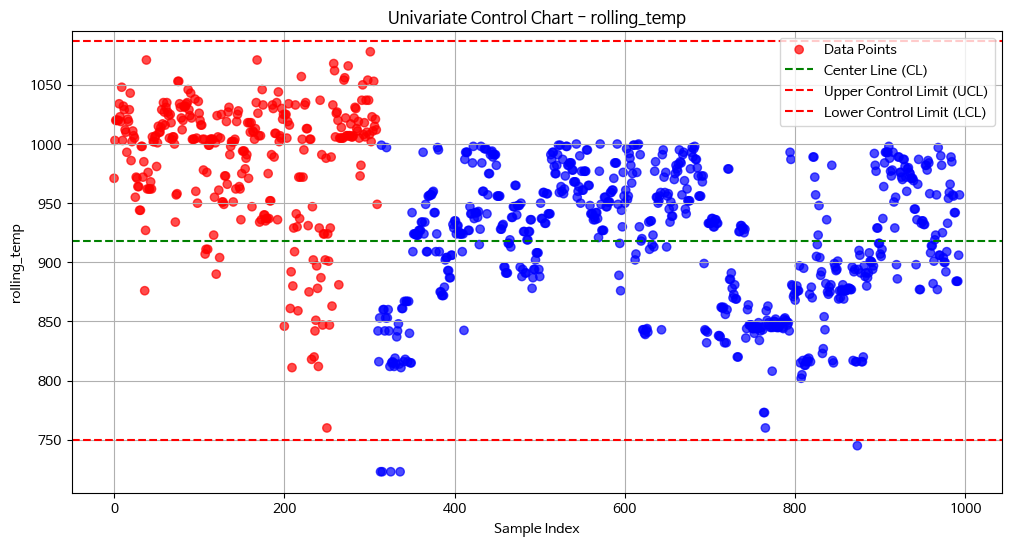

189


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ÏñëÌíà(OK)Í≥º Î∂àÎüâ(Defect) Íµ¨Î∂Ñ
df["Status"] = df["scale"].apply(lambda x: "OK" if x == "ÏñëÌíà" else "Defect")

# Îã®Î≥ÄÎüâ Í¥ÄÎ¶¨ÎèÑÎ•º ÏúÑÌïú Î≥ÄÏàò ÏÑ†ÌÉù
var = "rolling_temp"  # Î∂ÑÏÑùÌï† Îã®Î≥ÄÎüâ Î≥ÄÏàò

# ÏñëÌíà(OK) Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
df_ok = df[df["Status"] == "OK"]
CL = df_ok[var].mean()  # Ï§ëÏã¨ÏÑ†
sigma = df_ok[var].std()  # ÌëúÏ§ÄÌé∏Ï∞®
UCL = CL + (3 * sigma)  # ÏÉÅÌïú Í¥ÄÎ¶¨ ÌïúÍ≥Ñ
LCL = CL - (3 * sigma)  # ÌïòÌïú Í¥ÄÎ¶¨ ÌïúÍ≥Ñ

# ÏÉâÏÉÅ ÏÑ§Ï†ï (ÏñëÌíà=ÌååÎûë, Î∂àÎüâ=Îπ®Í∞ï)
colors = df["Status"].map({"OK": "blue", "Defect": "red"})

# Îã®Î≥ÄÎüâ Í¥ÄÎ¶¨ÎèÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df[var], c=colors, label="Data Points", alpha=0.7)
plt.axhline(CL, color='green', linestyle='--', label="Center Line (CL)")
plt.axhline(UCL, color='red', linestyle='--', label="Upper Control Limit (UCL)")
plt.axhline(LCL, color='red', linestyle='--', label="Lower Control Limit (LCL)")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title(f"Univariate Control Chart - {var}")
plt.xlabel("Sample Index")
plt.ylabel(var)
plt.legend()
plt.grid(True)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()
count_defect_under_150 = df[(df["Status"] == "Defect") & (df[var] >= 1000)].shape[0]
print(count_defect_under_150)

Ïò®ÎèÑÏùò Ï∞®Ïù¥Î≥¥Îã§ rolling_tempÍ∞íÎßå ÌñàÏùÑ ÎïåÍ∞Ä Îçî Ïûò Î∂ÑÎ•òÎêòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏùå

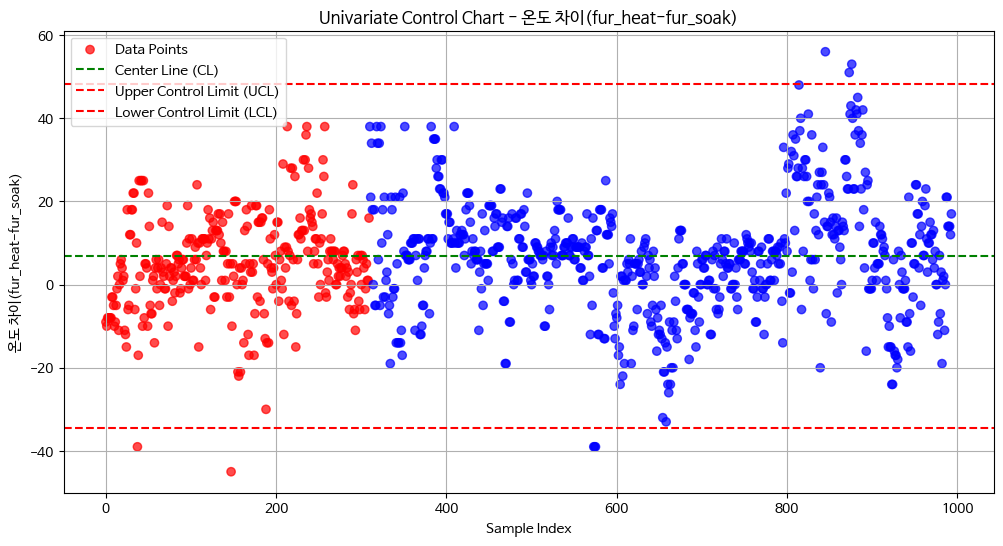

yÏ∂ï Í∞íÏù¥ 150 Ïù¥ÌïòÏù∏ Î∂àÎüâ Í∞úÏàò: 310


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ÏñëÌíà(OK)Í≥º Î∂àÎüâ(Defect) Íµ¨Î∂Ñ
df["Status"] = df["scale"].apply(lambda x: "OK" if x == "ÏñëÌíà" else "Defect")

# Îã®Î≥ÄÎüâ Í¥ÄÎ¶¨ÎèÑÎ•º ÏúÑÌïú Î≥ÄÏàò ÏÑ†ÌÉù
var = "Ïò®ÎèÑ Ï∞®Ïù¥(fur_heat-fur_soak)"  # Î∂ÑÏÑùÌï† Îã®Î≥ÄÎüâ Î≥ÄÏàò

# ÏñëÌíà(OK) Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
df_ok = df[df["Status"] == "OK"]
CL = df_ok[var].mean()  # Ï§ëÏã¨ÏÑ†
sigma = df_ok[var].std()  # ÌëúÏ§ÄÌé∏Ï∞®
UCL = CL + (3 * sigma)  # ÏÉÅÌïú Í¥ÄÎ¶¨ ÌïúÍ≥Ñ
LCL = CL - (3 * sigma)  # ÌïòÌïú Í¥ÄÎ¶¨ ÌïúÍ≥Ñ

# ÏÉâÏÉÅ ÏÑ§Ï†ï (ÏñëÌíà=ÌååÎûë, Î∂àÎüâ=Îπ®Í∞ï)
colors = df["Status"].map({"OK": "blue", "Defect": "red"})

# Îã®Î≥ÄÎüâ Í¥ÄÎ¶¨ÎèÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df[var], c=colors, label="Data Points", alpha=0.7)
plt.axhline(CL, color='green', linestyle='--', label="Center Line (CL)")
plt.axhline(UCL, color='red', linestyle='--', label="Upper Control Limit (UCL)")
plt.axhline(LCL, color='red', linestyle='--', label="Lower Control Limit (LCL)")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title(f"Univariate Control Chart - {var}")
plt.xlabel("Sample Index")
plt.ylabel(var)
plt.legend()
plt.grid(True)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()
count_defect_under_150 = df[(df["Status"] == "Defect") & (df[var] <= 150)].shape[0]

print("yÏ∂ï Í∞íÏù¥ 150 Ïù¥ÌïòÏù∏ Î∂àÎüâ Í∞úÏàò:", count_defect_under_150)

In [122]:
df

index        rolling_date scale   spec_long spec_country steel_kind  \
0      299  05JAN2023:08:40:39    Î∂àÎüâ  JS-SM490YB           ÏùºÎ≥∏          C   
1      283  05JAN2023:05:46:30    Î∂àÎüâ        AB/A           ÎØ∏Íµ≠          C   
2      282  05JAN2023:05:32:00    Î∂àÎüâ        NV-A           ÏòÅÍµ≠          C   
3      281  05JAN2023:05:21:10    Î∂àÎüâ        LR-A           ÏòÅÍµ≠          C   
4      280  05JAN2023:05:10:18    Î∂àÎüâ    JS-SS400           ÏùºÎ≥∏          C   
..     ...                 ...   ...         ...          ...        ...   
989    431  06JAN2023:07:34:08    ÏñëÌíà        GL-A           ÎèÖÏùº          C   
990    432  06JAN2023:07:43:26    ÏñëÌíà        KR-A           ÌïúÍµ≠          C   
991    433  06JAN2023:07:56:21    ÏñëÌíà        LR-A           ÏòÅÍµ≠          C   
992    435  06JAN2023:08:11:21    ÏñëÌíà        KR-A           ÌïúÍµ≠          C   
993    999  10JAN2023:06:16:27    ÏñëÌíà      GL-A32           ÎèÖÏùº          C   

     pt_thick  pt_width  pt_length hsb  ... rolling_temp descaling_count  \
0        16.0    2500.0    37400.0  Ï†ÅÏö©  ...        971.0             9.0   
1        24.0    2600.0    42000.0  Ï†ÅÏö©  ...       1003.0             8.0   
2        25.0    2500.0    36300.0  Ï†ÅÏö©  ...       1020.0             8.0   
3        25.0    2500.0    36300.0  Ï†ÅÏö©  ...       1020.0             8.0   
4        25.0    2500.0    36300.0  Ï†ÅÏö©  ...       1020.0             8.0   
..        ...       ...        ...  ..  ...          ...             ...   
989      14.0    3500.0    43000.0  Ï†ÅÏö©  ...        884.0            10.0   
990      14.0    3500.0    43000.0  Ï†ÅÏö©  ...        884.0            10.0   
991      14.0    3500.0    43000.0  Ï†ÅÏö©  ...        884.0            10.0   
992      12.0    3400.0    43100.0  Ï†ÅÏö©  ...        906.0            10.0   
993      16.0    3400.0    54200.0  Ï†ÅÏö©  ...        957.0            10.0   

     work_group   ÎÖ∏ÎÉâÏãúÍ∞Ñ ÎπÑÏú®  Class_Code    Grade  \
0            1Ï°∞  0.354369          JS  SM490YB   
1            2Ï°∞  0.287805          AB        A   
2            2Ï°∞  0.380952          NV        A   
3            2Ï°∞  0.396624          LR        A   
4            2Ï°∞  0.352941          JS    SS400   
..          ...       ...         ...      ...   
989          1Ï°∞  0.435780          GL        A   
990          1Ï°∞  0.440909          KR        A   
991          1Ï°∞  0.427907          LR        A   
992          1Ï°∞  0.342342          KR        A   
993          4Ï°∞  0.389423          GL      A32   

     Ïò®ÎèÑ Ï∞®Ïù¥(fur_soak - rolling_temp)  Status        T2  \
0                             178.0  Defect  1.992376   
1                             142.0  Defect  5.143935   
2                             117.0  Defect  8.605741   
3                             117.0  Defect  8.605741   
4                             117.0  Defect  8.605741   
..                              ...     ...       ...   
989                           291.0      OK  5.465721   
990                           291.0      OK  5.465721   
991                           291.0      OK  5.465721   
992                           266.0      OK  3.118336   
993                           212.0      OK  2.232635   

     Ïò®ÎèÑ Ï∞®Ïù¥(fur_heat-fur_soak)  
0                        -9.0  
1                       -10.0  
2                        -8.0  
3                        -8.0  
4                        -8.0  
..                        ...  
989                      14.0  
990                      14.0  
991                      14.0  
992                      12.0  
993                      17.0  

[994 rows x 28 columns]

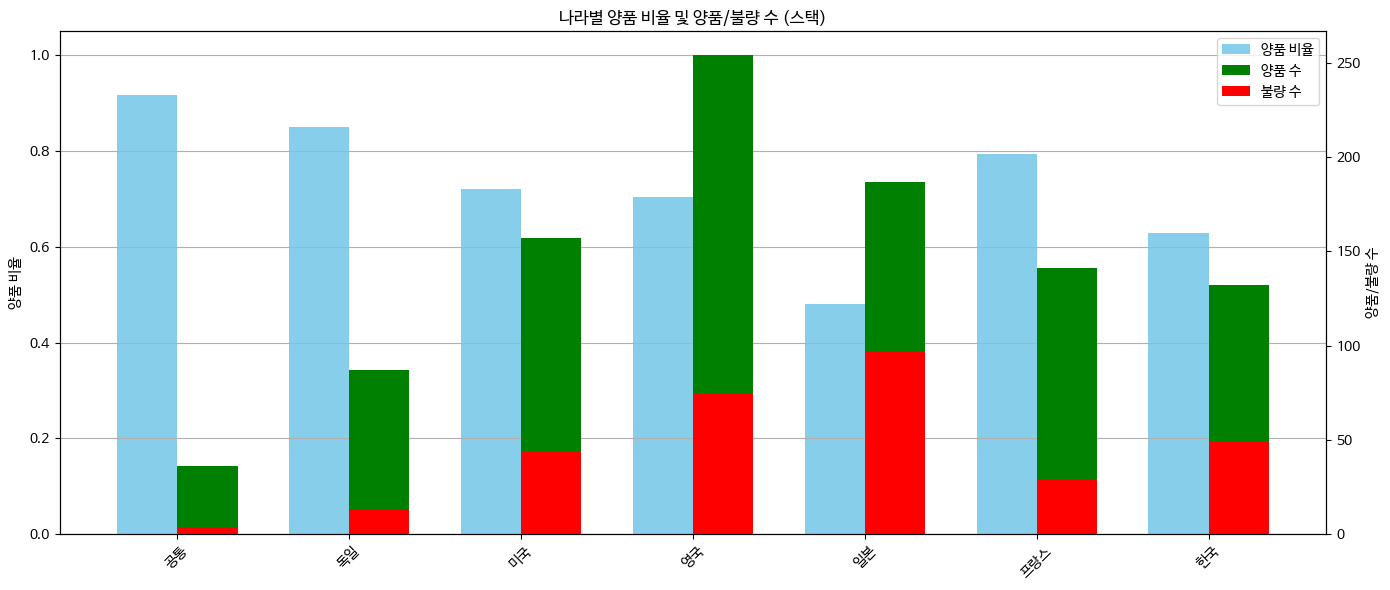

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ÎÇòÎùºÎ≥Ñ Ï†ÑÏ≤¥ Ïàò, ÏñëÌíà Ïàò, Î∂àÎüâ Ïàò Í≥ÑÏÇ∞
country_total = df.groupby("spec_country").size()
country_ok = df[df["Status"] == "OK"].groupby("spec_country").size()
country_defect = df[df["Status"] == "Defect"].groupby("spec_country").size()

# ÎπÑÏú® Í≥ÑÏÇ∞
ok_ratio = (country_ok / country_total).fillna(0)

# ÏñëÌíà/Î∂àÎüâ Ïàò NaN Î≥¥Ï†ï
country_ok = country_ok.reindex(country_total.index, fill_value=0)
country_defect = country_defect.reindex(country_total.index, fill_value=0)

# xÏ∂ï ÏúÑÏπò ÏÑ§Ï†ï
countries = country_total.index
x = np.arange(len(countries))
width = 0.35  # ÎßâÎåÄ ÎÑàÎπÑ

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, ax1 = plt.subplots(figsize=(14, 6))

# 1Ô∏è‚É£ ÏôºÏ™Ω YÏ∂ï: ÎπÑÏú® ÎßâÎåÄÍ∑∏ÎûòÌîÑ
ax1.bar(x - width/2, ok_ratio, width=width, color='skyblue', label='ÏñëÌíà ÎπÑÏú®')
ax1.set_ylabel("ÏñëÌíà ÎπÑÏú®")
ax1.set_ylim(0, 1.05)

# 2Ô∏è‚É£ Ïò§Î•∏Ï™Ω YÏ∂ï: ÏñëÌíà/Î∂àÎüâ Ïàò Ïä§ÌÉùÌòï ÎßâÎåÄÍ∑∏ÎûòÌîÑ
ax2 = ax1.twinx()
ax2.bar(x + width/2, country_ok, width=width, label='ÏñëÌíà Ïàò', color='green', bottom=country_defect)
ax2.bar(x + width/2, country_defect, width=width, label='Î∂àÎüâ Ïàò', color='red')
ax2.set_ylabel("ÏñëÌíà/Î∂àÎüâ Ïàò")

# xÏ∂ï ÏÑ§Ï†ï
ax1.set_xticks(x)
ax1.set_xticklabels(countries, rotation=45)

# Ï†úÎ™© Î∞è Î≤îÎ°Ä
plt.title("ÎÇòÎùºÎ≥Ñ ÏñëÌíà ÎπÑÏú® Î∞è ÏñëÌíà/Î∂àÎüâ Ïàò (Ïä§ÌÉù)")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Í∑∏Î¶¨Îìú Î∞è Ï∂úÎ†•
ax1.grid(axis='y')
plt.tight_layout()
plt.show()


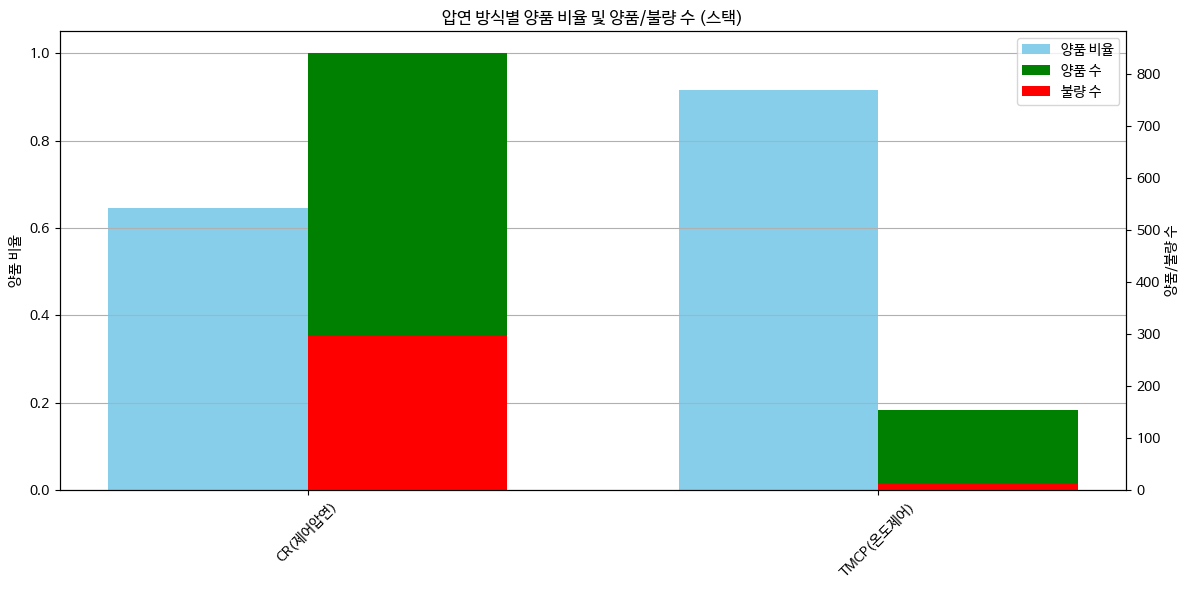

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ÏïïÏó∞ Î∞©ÏãùÎ≥Ñ Ï†ÑÏ≤¥ Ïàò, ÏñëÌíà Ïàò, Î∂àÎüâ Ïàò Í≥ÑÏÇ∞
method_total = df.groupby("rolling_method").size()
method_ok = df[df["Status"] == "OK"].groupby("rolling_method").size()
method_defect = df[df["Status"] == "Defect"].groupby("rolling_method").size()

# ÎπÑÏú® Í≥ÑÏÇ∞
ok_ratio = (method_ok / method_total).fillna(0)

# NaN Î≥¥Ï†ï
method_ok = method_ok.reindex(method_total.index, fill_value=0)
method_defect = method_defect.reindex(method_total.index, fill_value=0)

# xÏ∂ï ÏúÑÏπò ÏÑ§Ï†ï
methods = method_total.index
x = np.arange(len(methods))
width = 0.35

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, ax1 = plt.subplots(figsize=(12, 6))

# 1Ô∏è‚É£ ÏñëÌíà ÎπÑÏú® (ÏôºÏ™Ω YÏ∂ï)
ax1.bar(x - width/2, ok_ratio, width=width, color='skyblue', label='ÏñëÌíà ÎπÑÏú®')
ax1.set_ylabel("ÏñëÌíà ÎπÑÏú®")
ax1.set_ylim(0, 1.05)

# 2Ô∏è‚É£ ÏñëÌíà/Î∂àÎüâ Ïàò (Ïò§Î•∏Ï™Ω YÏ∂ï Ïä§ÌÉùÌòï ÎßâÎåÄ)
ax2 = ax1.twinx()
ax2.bar(x + width/2, method_ok, width=width, label='ÏñëÌíà Ïàò', color='green', bottom=method_defect)
ax2.bar(x + width/2, method_defect, width=width, label='Î∂àÎüâ Ïàò', color='red')
ax2.set_ylabel("ÏñëÌíà/Î∂àÎüâ Ïàò")

# xÏ∂ï ÏÑ§Ï†ï
ax1.set_xticks(x)
ax1.set_xticklabels(methods, rotation=45)

# Ï†úÎ™© Î∞è Î≤îÎ°Ä
plt.title("ÏïïÏó∞ Î∞©ÏãùÎ≥Ñ ÏñëÌíà ÎπÑÏú® Î∞è ÏñëÌíà/Î∂àÎüâ Ïàò (Ïä§ÌÉù)")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Í∑∏Î¶¨Îìú Î∞è Ï∂úÎ†•
ax1.grid(axis='y')
plt.tight_layout()
plt.show()


Íµ¨Î∂Ñ	TMCP (Thermo-Mechanical Controlled Process)	CR (Conventional Reheating-Rolling)
Î∞©Ïãù	Ïó¥Ï≤òÎ¶¨ÏôÄ ÏïïÏó∞ÏùÑ ÎèôÏãúÏóê Ï†úÏñ¥ÌïòÎäî Ï†ïÎ∞Ä Í≥µÏ†ï	Ïû¨Í∞ÄÏó¥ ÌõÑ Îã®Ïàú ÏïïÏó∞
Ï†úÏñ¥ ÏàòÏ§Ä	Ïò®ÎèÑ, ÏïïÎ†•, ÏÜçÎèÑ Îì± Ï†ïÎ∞Ä Ï†úÏñ¥ Í∞ÄÎä•	ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îã®ÏàúÌïòÍ≥† Í∏∞Í≥ÑÏ†Å Î∞òÎ≥µ
ÌíàÏßà ÏïàÏ†ïÏÑ±	Ï°∞ÏßÅ ÎØ∏ÏÑ∏Ìôî ‚Üí Í∑†ÏùºÌïú Í∞ïÎèÑÏôÄ Ïó∞ÏÑ± ÌôïÎ≥¥	ÌíàÏßà Ìé∏Ï∞® ÌÅ¨Í≥†, Ïó¥Ï≤òÎ¶¨ Í∑†ÏùºÏÑ± Î∂ÄÏ°±
Î∂àÎüâ ÏõêÏù∏	Í≥µÏ†ïÏù¥ Ï†ïÎ∞ÄÌï¥ Î∂àÎüâ Í∞ÄÎä•ÏÑ± ÎÇÆÏùå	Ïû¨Í∞ÄÏó¥ Î∂àÍ∑†Ìòï Îì±ÏúºÎ°ú Î∂àÎüâÎ•† ÎÜíÏùå

‚û° TMCPÎäî Î¨ºÎ¶¨Ï†Å Ïó¥Ï≤òÎ¶¨ÏôÄ ÏïïÏó∞Ïù¥ Ï†ïÎ∞ÄÌïòÍ≤å Ï†úÏñ¥ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê, Ï†úÌíà ÌäπÏÑ±Ïùò Í∑†ÏùºÏÑ±Í≥º Í≥µÏ†ï ÏïàÏ†ïÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§.
Î∞òÎ©¥, CRÏùÄ Í≥µÏ†ï Ï°∞Í±¥Ïùò Ìé∏Ï∞®Í∞Ä ÌÅ¥ Í≤ΩÏö∞ Î∂àÎüâÎ•† Ï¶ùÍ∞Ä Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅΩÎãàÎã§.

##### Ï†úÏñ¥ÏïïÏó∞(CR) ÎåÄÌïú Î∂àÎüâÏùÑ ÏòàÏ∏°Ìï¥Ïïº Ï†ÑÏ≤¥Ï†ÅÏù∏ Í≤∞Í≥ºÍ∞Ä Ï¢ãÍ≤å ÎÇòÏò¨ Í≤ÉÏù¥ÎùºÍ≥† ÌåêÎã®Ìï®

In [133]:
df_CR=df[df["rolling_method"]=="CR(Ï†úÏñ¥ÏïïÏó∞)"]

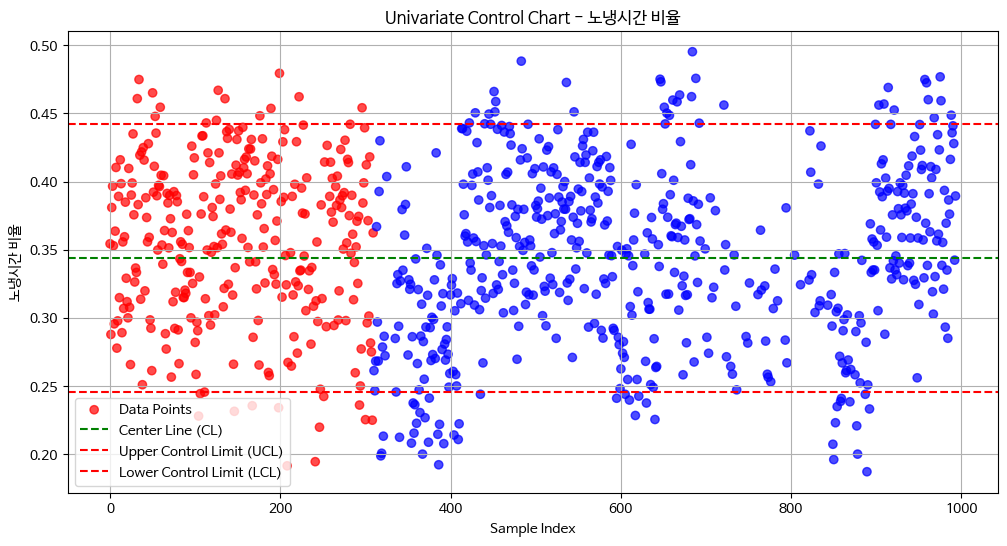

yÏ∂ï Í∞íÏù¥ 150 Ïù¥ÌïòÏù∏ Î∂àÎüâ Í∞úÏàò: 297


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ÏñëÌíà(OK)Í≥º Î∂àÎüâ(Defect) Íµ¨Î∂Ñ
df_CR["Status"] = df_CR["scale"].apply(lambda x: "OK" if x == "ÏñëÌíà" else "Defect")

# Îã®Î≥ÄÎüâ Í¥ÄÎ¶¨ÎèÑÎ•º ÏúÑÌïú Î≥ÄÏàò ÏÑ†ÌÉù
var = "ÎÖ∏ÎÉâÏãúÍ∞Ñ ÎπÑÏú®"  # Î∂ÑÏÑùÌï† Îã®Î≥ÄÎüâ Î≥ÄÏàò

# ÏñëÌíà(OK) Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
df_ok = df_CR[df_CR["Status"] == "OK"]
CL = df_ok[var].mean()  # Ï§ëÏã¨ÏÑ†
sigma = df_ok[var].std()  # ÌëúÏ§ÄÌé∏Ï∞®
UCL = CL + (1.5 * sigma)  # ÏÉÅÌïú Í¥ÄÎ¶¨ ÌïúÍ≥Ñ
LCL = CL - (1.5 * sigma)  # ÌïòÌïú Í¥ÄÎ¶¨ ÌïúÍ≥Ñ

# ÏÉâÏÉÅ ÏÑ§Ï†ï (ÏñëÌíà=ÌååÎûë, Î∂àÎüâ=Îπ®Í∞ï)
colors = df_CR["Status"].map({"OK": "blue", "Defect": "red"})

# Îã®Î≥ÄÎüâ Í¥ÄÎ¶¨ÎèÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
plt.scatter(df_CR.index, df_CR[var], c=colors, label="Data Points", alpha=0.7)
plt.axhline(CL, color='green', linestyle='--', label="Center Line (CL)")
plt.axhline(UCL, color='red', linestyle='--', label="Upper Control Limit (UCL)")
plt.axhline(LCL, color='red', linestyle='--', label="Lower Control Limit (LCL)")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title(f"Univariate Control Chart - {var}")
plt.xlabel("Sample Index")
plt.ylabel(var)
plt.legend()
plt.grid(True)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()
count_defect_under_150 = df_CR[(df_CR["Status"] == "Defect") & (df_CR[var] <= 150)].shape[0]

print("yÏ∂ï Í∞íÏù¥ 150 Ïù¥ÌïòÏù∏ Î∂àÎüâ Í∞úÏàò:", count_defect_under_150)

In [149]:
df.select_dtypes(include='number')

index  pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
0      299      16.0    2500.0    37400.0         1140.0           83.0   
1      283      24.0    2600.0    42000.0         1135.0           96.0   
2      282      25.0    2500.0    36300.0         1129.0           97.0   
3      281      25.0    2500.0    36300.0         1129.0           97.0   
4      280      25.0    2500.0    36300.0         1129.0           97.0   
..     ...       ...       ...        ...            ...            ...   
989    431      14.0    3500.0    43000.0         1189.0           63.0   
990    432      14.0    3500.0    43000.0         1189.0           63.0   
991    433      14.0    3500.0    43000.0         1189.0           63.0   
992    435      12.0    3400.0    43100.0         1184.0           76.0   
993    999      16.0    3400.0    54200.0         1186.0           82.0   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
0           1149.0           50.0           206.0         971.0   
1           1145.0           50.0           205.0        1003.0   
2           1137.0           46.0           231.0        1020.0   
3           1137.0           46.0           237.0        1020.0   
4           1137.0           46.0           221.0        1020.0   
..             ...            ...             ...           ...   
989         1175.0           60.0           218.0         884.0   
990         1175.0           60.0           220.0         884.0   
991         1175.0           60.0           215.0         884.0   
992         1172.0           70.0           222.0         906.0   
993         1169.0           45.0           208.0         957.0   

     descaling_count   ÎÖ∏ÎÉâÏãúÍ∞Ñ ÎπÑÏú®  Ïò®ÎèÑ Ï∞®Ïù¥(fur_soak - rolling_temp)        T2  \
0                9.0  0.354369                           178.0  1.992376   
1                8.0  0.287805                           142.0  5.143935   
2                8.0  0.380952                           117.0  8.605741   
3                8.0  0.396624                           117.0  8.605741   
4                8.0  0.352941                           117.0  8.605741   
..               ...       ...                             ...       ...   
989             10.0  0.435780                           291.0  5.465721   
990             10.0  0.440909                           291.0  5.465721   
991             10.0  0.427907                           291.0  5.465721   
992             10.0  0.342342                           266.0  3.118336   
993             10.0  0.389423                           212.0  2.232635   

     Ïò®ÎèÑ Ï∞®Ïù¥(fur_heat-fur_soak)  
0                        -9.0  
1                       -10.0  
2                        -8.0  
3                        -8.0  
4                        -8.0  
..                        ...  
989                      14.0  
990                      14.0  
991                      14.0  
992                      12.0  
993                      17.0  

[994 rows x 15 columns]

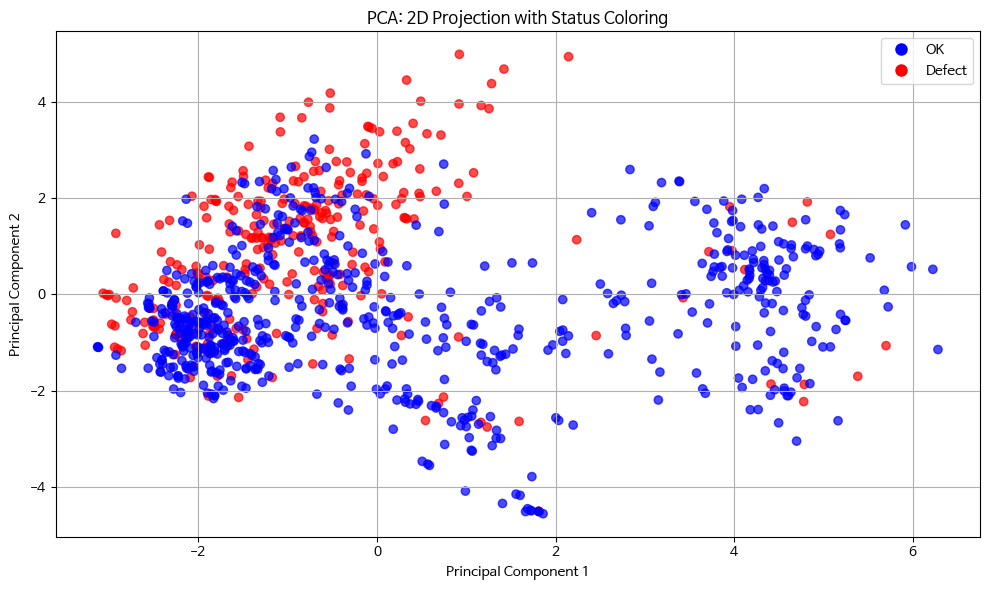

In [148]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# üîπ ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù (ÏàòÏπòÌòï Î≥ÄÏàòÎßå)
variables = ["pt_thick", "pt_width", "pt_length", "fur_heat_temp", "fur_heat_time", "fur_soak_temp", "fur_soak_time","rolling_temp"]

# üîπ Í≤∞Ï∏°Ïπò Ï†úÍ±∞ (ÎòêÎäî ÌïÑÏöîÏãú ÎåÄÏ≤¥ Ï≤òÎ¶¨)
df_clean = df.dropna(subset=variables)

# üîπ Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean[variables])

# üîπ PCA ÏàòÌñâ (2Í∞ú Ï£ºÏÑ±Î∂Ñ)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# üîπ Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï£ºÏÑ±Î∂Ñ Ï∂îÍ∞Ä
df_clean["PC1"] = pca_result[:, 0]
df_clean["PC2"] = pca_result[:, 1]

# üîπ ÏãúÍ∞ÅÌôî (ÏñëÌíà/Î∂àÎüâ ÏÉâÏÉÅ Íµ¨Î∂Ñ)
colors = df_clean["Status"].map({"OK": "blue", "Defect": "red"})

plt.figure(figsize=(10, 6))
plt.scatter(df_clean["PC1"], df_clean["PC2"], c=colors, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: 2D Projection with Status Coloring")
plt.grid(True)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='OK', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Defect', markerfacecolor='red', markersize=10)
])
plt.tight_layout()
plt.show()


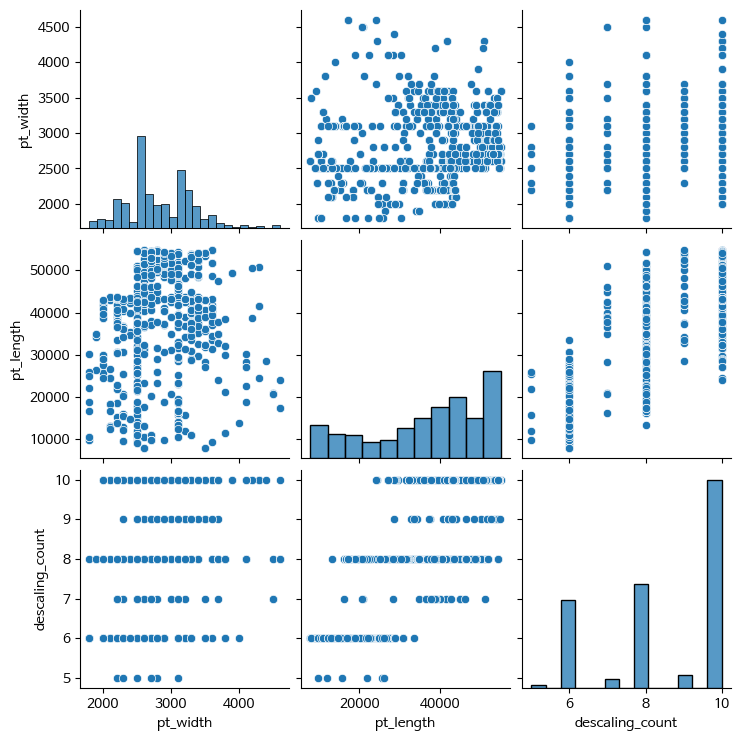

In [152]:
sns.pairplot(df[["pt_width", "pt_length","descaling_count"]])